In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, util
from sklearn.feature_extraction import image
from sklearn.decomposition import MiniBatchDictionaryLearning


In [ ]:
image_path = 'flower_noisy.jpg'
noisy_image = io.imread(image_path)
noisy_image = util.img_as_float(noisy_image)


In [ ]:
patch_size = (7, 7)
patches = image.extract_patches_2d(noisy_image, patch_size)
data = patches.reshape(patches.shape[0], -1)


In [ ]:
n_components = 100
dl = MiniBatchDictionaryLearning(n_components=n_components, alpha=1.0, max_iter=500)
dl.fit(data)

MiniBatchDictionaryLearning(alpha=1.0, max_iter=500, n_components=100)

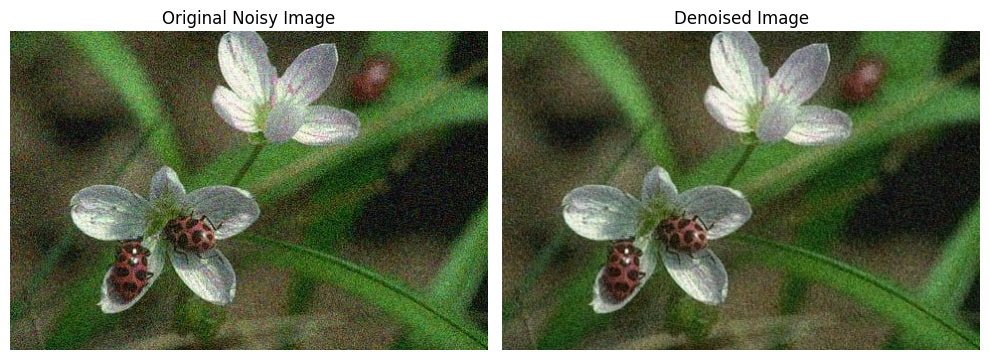

In [ ]:
code = dl.transform(data)
reconstructed_patches = np.dot(code, dl.components_)
reconstructed_image = image.reconstruct_from_patches_2d(reconstructed_patches.reshape(patches.shape), noisy_image.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Noisy Image')
plt.imshow(noisy_image, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Denoised Image')
plt.imshow(reconstructed_image, cmap=plt.cm.gray)
plt.axis('off')

plt.tight_layout()
plt.show()